In [2]:
import pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.listdir("./",)

['TypeA1Models.ipynb',
 'TypeB2Models.ipynb',
 'dataProcess.ipynb',
 'metrics.csv',
 'TypeB1Models.ipynb',
 'model_metricsB1.csv',
 'model_metricsB2.csv',
 'model_metricsA2.csv',
 'model_metricsA1.csv',
 'TypeCModels.ipynb',
 'model.ipynb',
 'testResults.ipynb',
 'model_metricsC.csv',
 'TypeA2Models.ipynb']

In [4]:
import pandas as pd

file_list = ['model_metricsA1.csv', 'model_metricsA2.csv', 'model_metricsB1.csv', 'model_metricsB2.csv', 'model_metricsC.csv']
dfs = []

for i, file in enumerate(file_list):
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        # Modify the "Model" column name differently
        df = df.rename(columns={"Model": "Model"})
        
        # Modify the other column names based on the file index
        if i == 0:
            df.columns = [f"{col}A1" if col != "Model" else col for col in df.columns]
        elif i == 1:
            df.columns = [f"{col}A2" if col != "Model" else col for col in df.columns]
        elif i == 2:
            df.columns = [f"{col}B1" if col != "Model" else col for col in df.columns]
        elif i == 3:
            df.columns = [f"{col}B2" if col != "Model" else col for col in df.columns]
        elif i == 4:
            df.columns = [f"{col}C" if col != "Model" else col for col in df.columns]
        dfs.append(df)
    else:
        continue

combined_df = pd.concat(dfs, ignore_index=True)

# Merge the DataFrames on the common "Model" column
merged_df = pd.DataFrame()
for i in range(len(dfs)):
    if i == 0:
        merged_df = dfs[i]
    else:
        merged_df = pd.merge(merged_df, dfs[i], on='Model', how='outer')

In [5]:

merged_df.to_csv("./metrics.csv")
merged_df.columns

Index(['Model', 'AccuracyA1', 'PrecisionA1', 'RecallA1', 'F1A1', 'AccuracyA2',
       'PrecisionA2', 'RecallA2', 'F1A2', 'AccuracyB1', 'PrecisionB1',
       'RecallB1', 'F1B1', 'AccuracyB2', 'PrecisionB2', 'RecallB2', 'F1B2',
       'AccuracyC', 'PrecisionC', 'RecallC', 'F1C'],
      dtype='object')

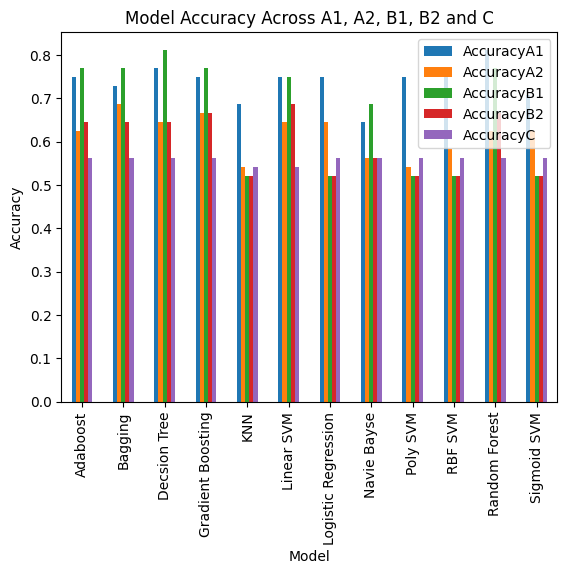

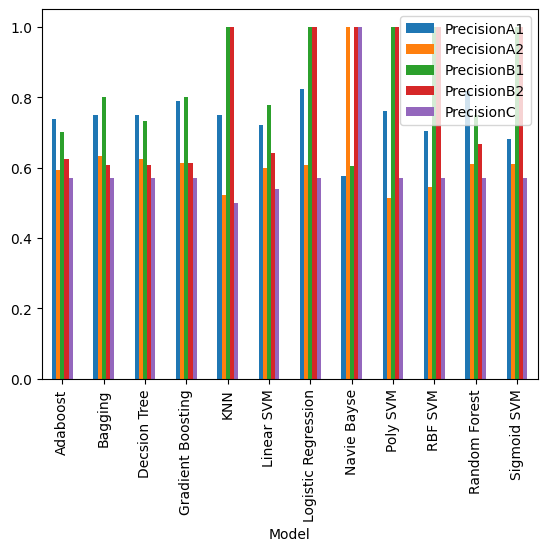

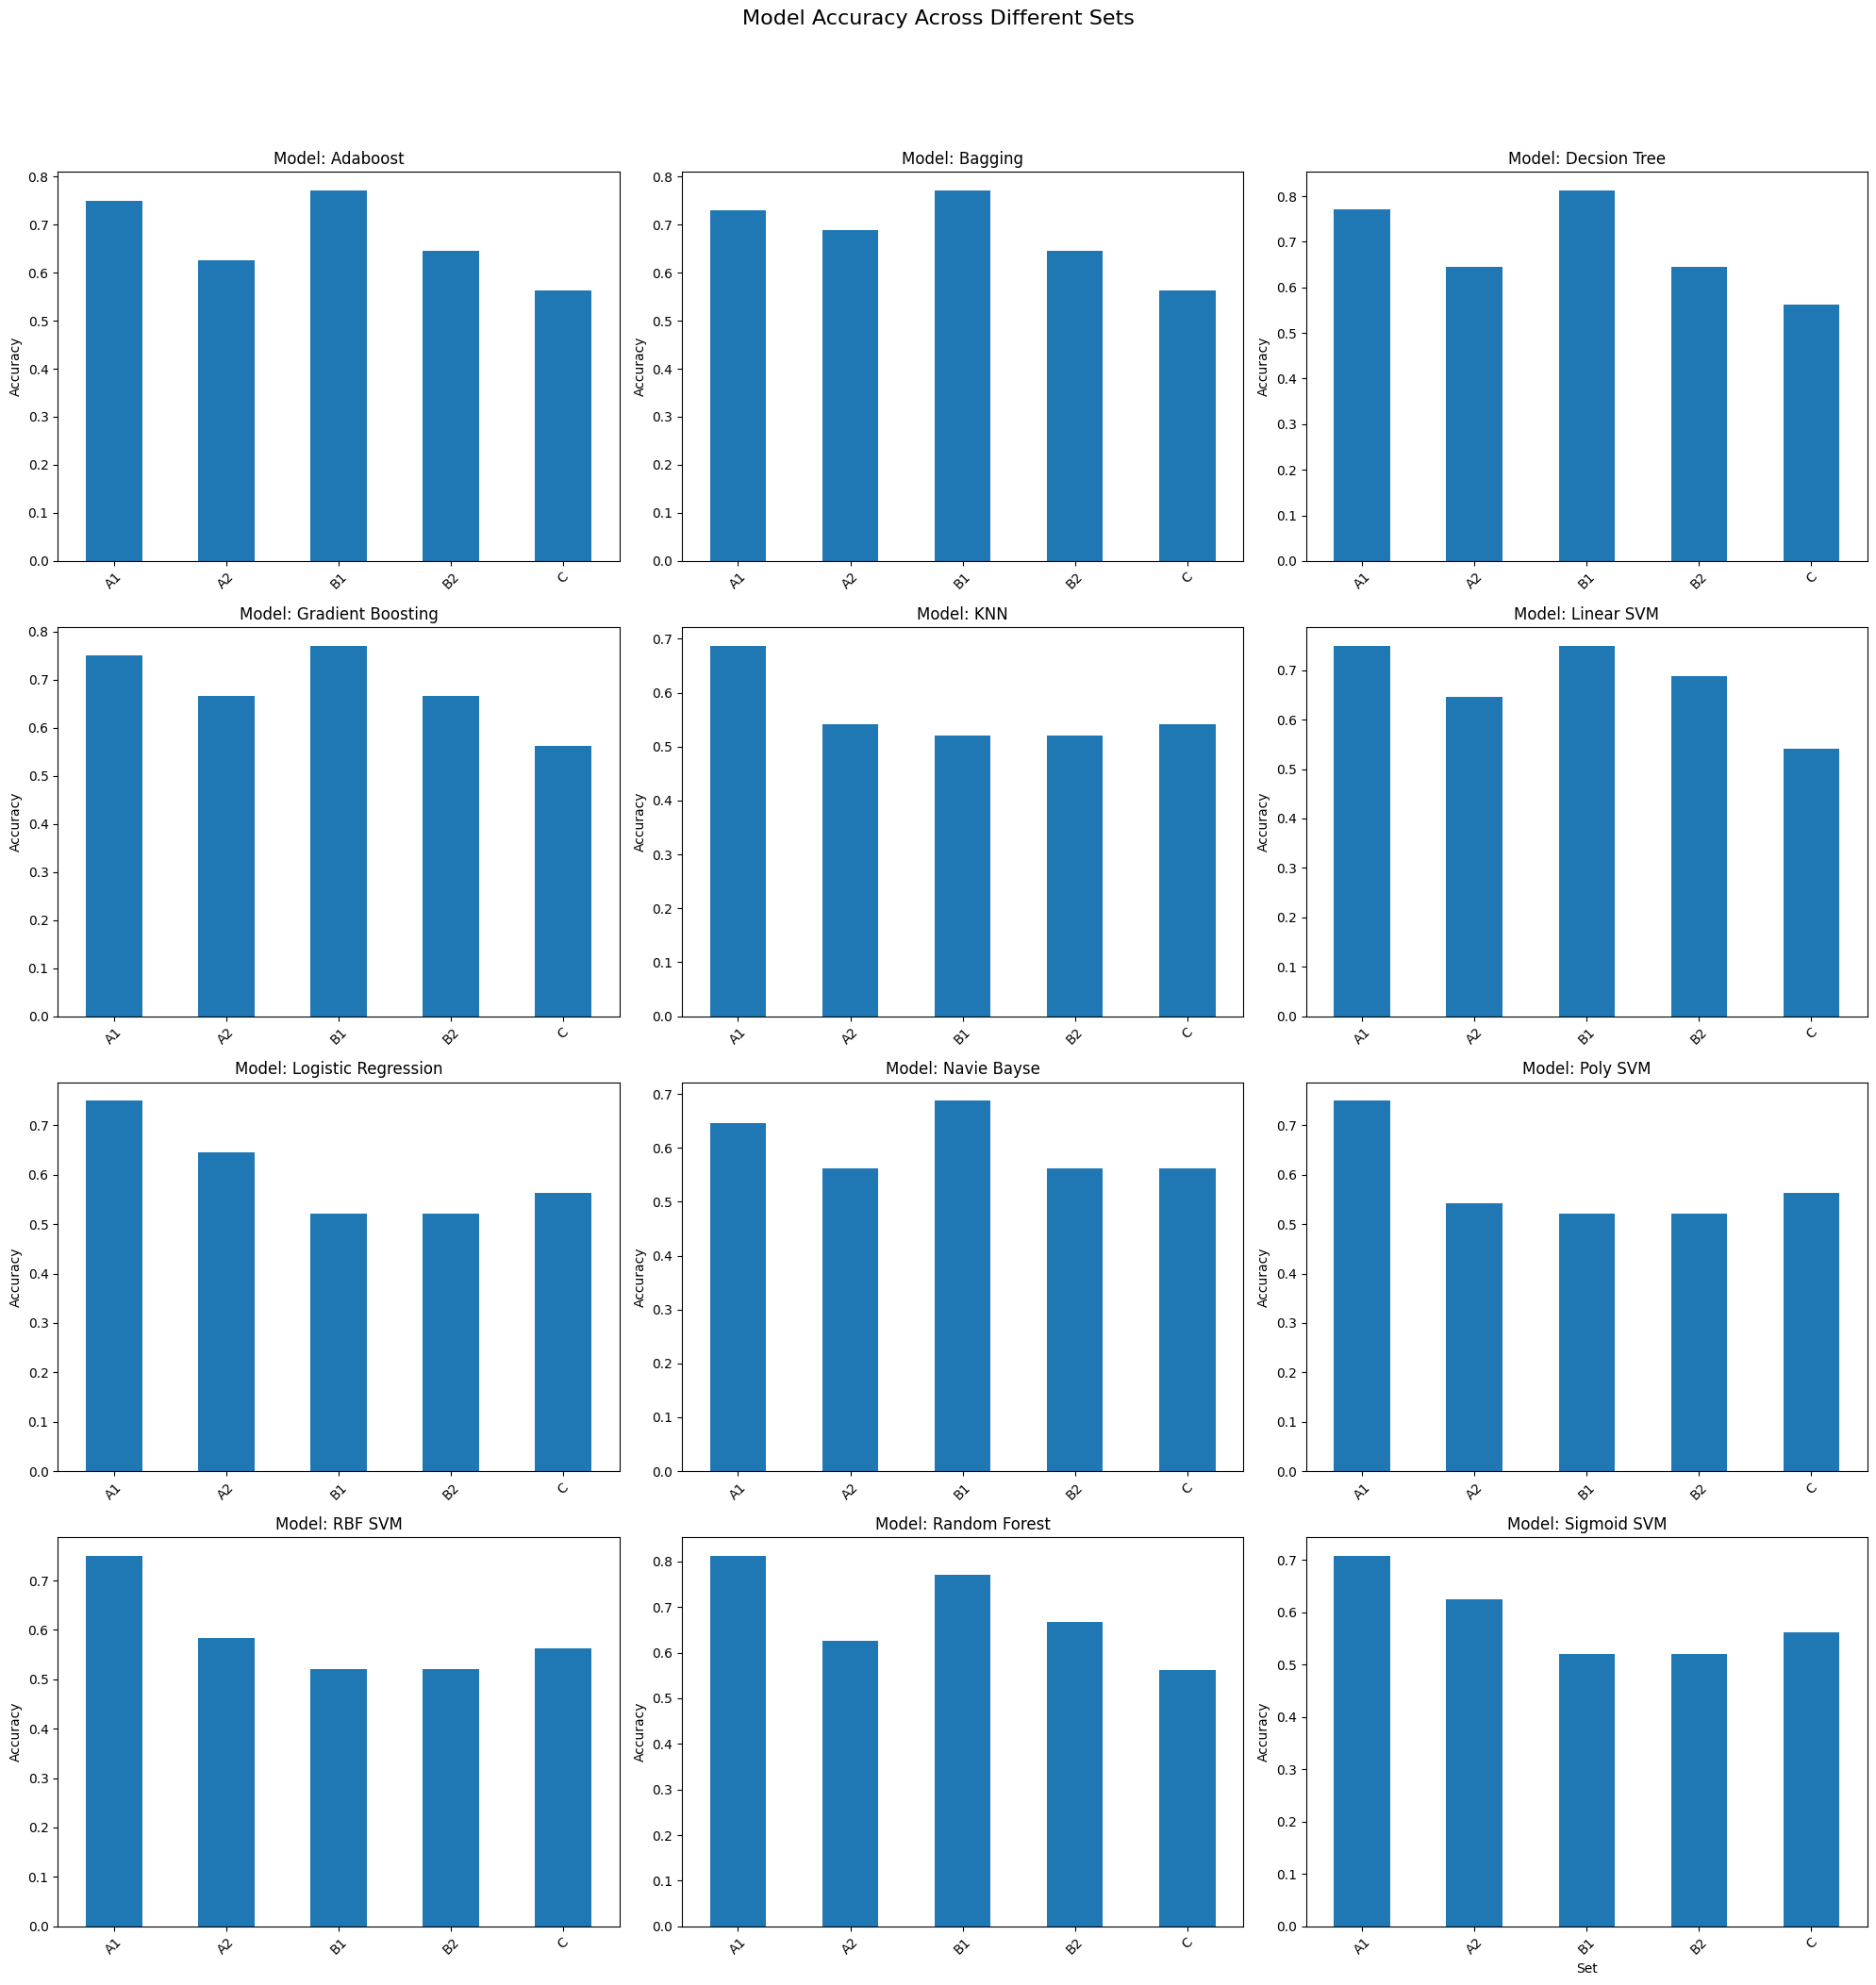

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame

# Plot 1: Models Performance in A1, A2, B1, B2 and C (Bar chart)
model_acc = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']].first()
model_pres = merged_df.groupby('Model')[['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC']].max()
model_performances = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']]
model_performances = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']]
model_acc.plot(kind='bar')  # Already set to bar chart
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across A1, A2, B1, B2 and C')
plt.show()
model_pres.plot(kind='bar')
plt.show()
model_acc.head()

num_models = len(model_acc)
num_rows = 4
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Plotting bar chart for each model
for i, (model, data) in enumerate(model_acc.iterrows()):
    row = i // num_cols
    col = i % num_cols
    data.plot(kind='bar', ax=axes[row, col], color='C0')
    axes[row, col].set_title(f'Model: {model}')
    axes[row, col].set_ylabel('Accuracy')
    axes[row, col].set_xticklabels(['A1', 'A2', 'B1', 'B2', 'C'], rotation=45)

# Turn off empty subplots
for i in range(num_models, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')
fig.suptitle('Model Accuracy Across Different Sets', fontsize=16, y=1.05)
plt.xlabel('Set')
plt.tight_layout()
plt.show()

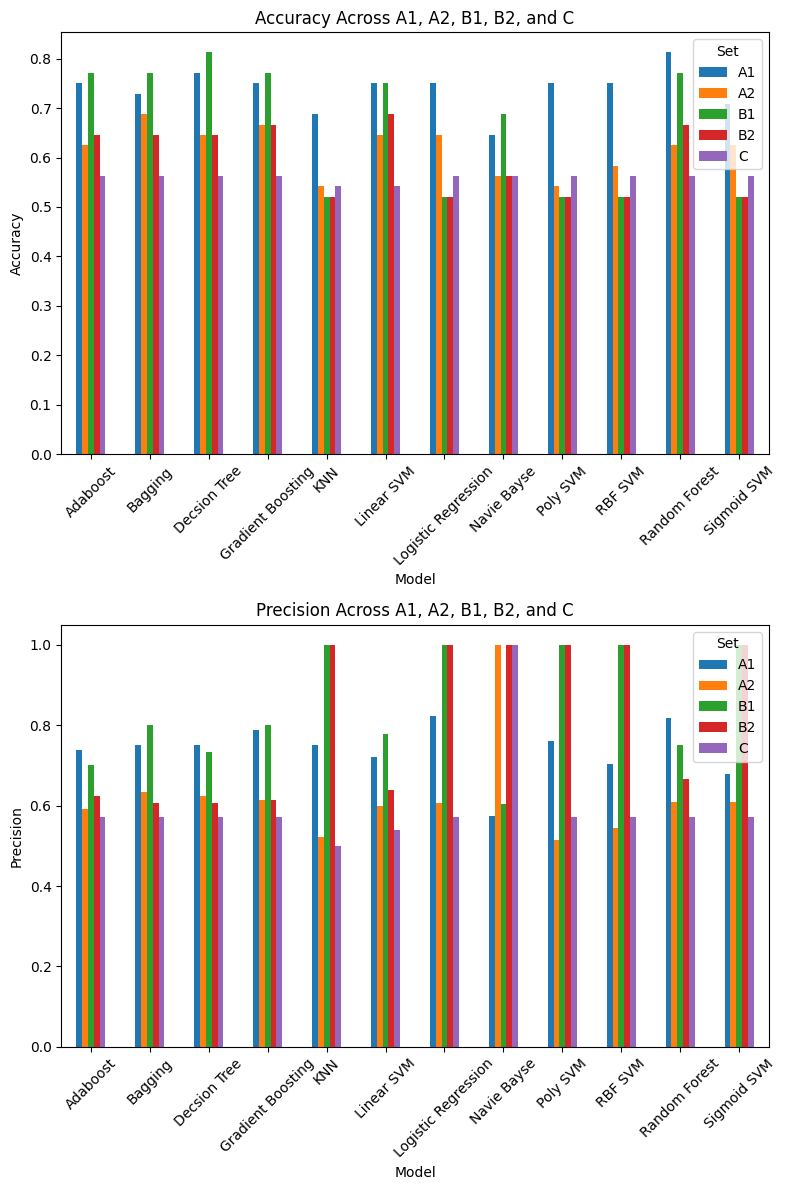

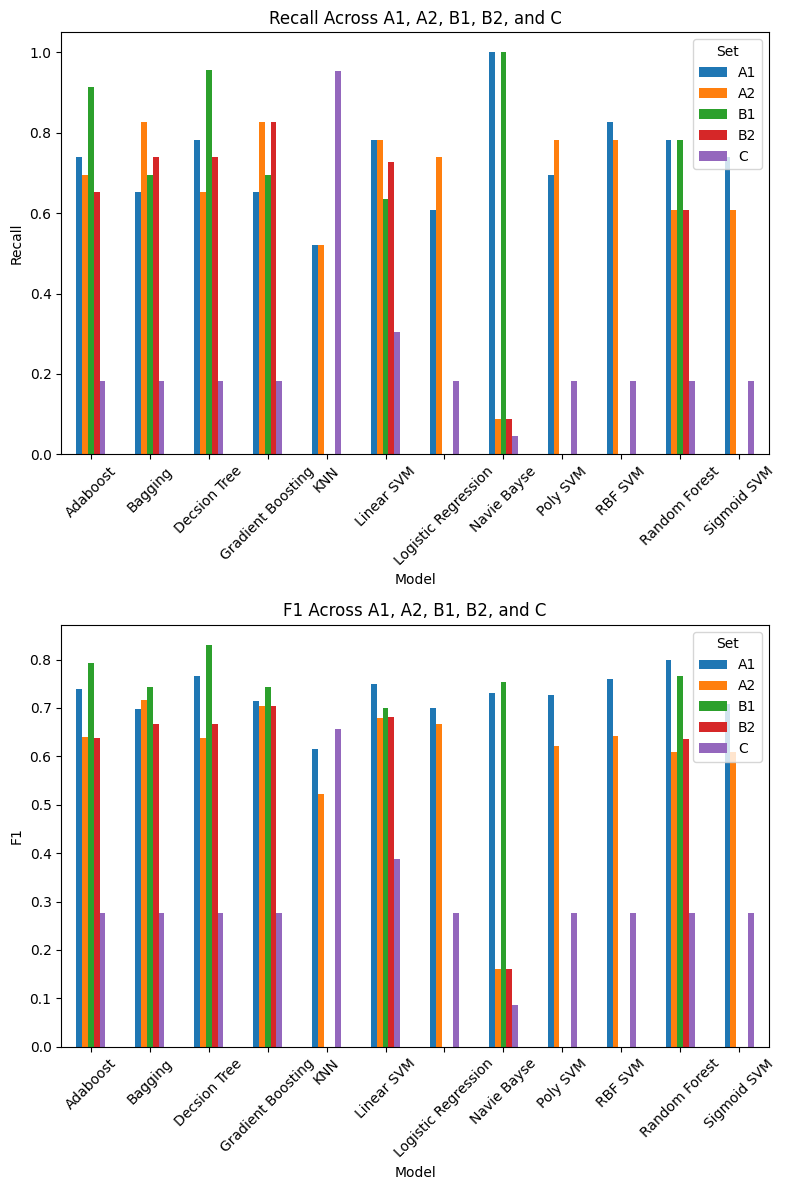

In [42]:
model_acc = merged_df.groupby('Model')[['AccuracyA1', 'AccuracyA2', 'AccuracyB1', 'AccuracyB2', 'AccuracyC']].first()
model_pres = merged_df.groupby('Model')[['PrecisionA1', 'PrecisionA2', 'PrecisionB1', 'PrecisionB2', 'PrecisionC']].max()
model_recall = merged_df.groupby('Model')[['RecallA1', 'RecallA2', 'RecallB1', 'RecallB2', 'RecallC']].max()
model_f1 = merged_df.groupby('Model')[['F1A1', 'F1A2', 'F1B1', 'F1B2', 'F1C']].max()

import matplotlib.pyplot as plt

# List of metrics
fig, axes1 = plt.subplots(2, 1, figsize=(8, 12))

# Plotting Accuracy
model_acc.plot(kind='bar', ax=axes1[0], rot=45)
axes1[0].set_title('Accuracy Across A1, A2, B1, B2, and C')
axes1[0].set_xlabel('Model')
axes1[0].set_ylabel('Accuracy')
axes1[0].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

# Plotting Precision
model_pres.plot(kind='bar', ax=axes1[1], rot=45)
axes1[1].set_title('Precision Across A1, A2, B1, B2, and C')
axes1[1].set_xlabel('Model')
axes1[1].set_ylabel('Precision')
axes1[1].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

plt.tight_layout()
plt.show()

# Create the second plot with one column and two rows for Recall and F1
fig, axes2 = plt.subplots(2, 1, figsize=(8, 12))

# Plotting Recall
model_recall.plot(kind='bar', ax=axes2[0], rot=45)
axes2[0].set_title('Recall Across A1, A2, B1, B2, and C')
axes2[0].set_xlabel('Model')
axes2[0].set_ylabel('Recall')
axes2[0].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

# Plotting F1
model_f1.plot(kind='bar', ax=axes2[1], rot=45)
axes2[1].set_title('F1 Across A1, A2, B1, B2, and C')
axes2[1].set_xlabel('Model')
axes2[1].set_ylabel('F1')
axes2[1].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

plt.tight_layout()
plt.show()


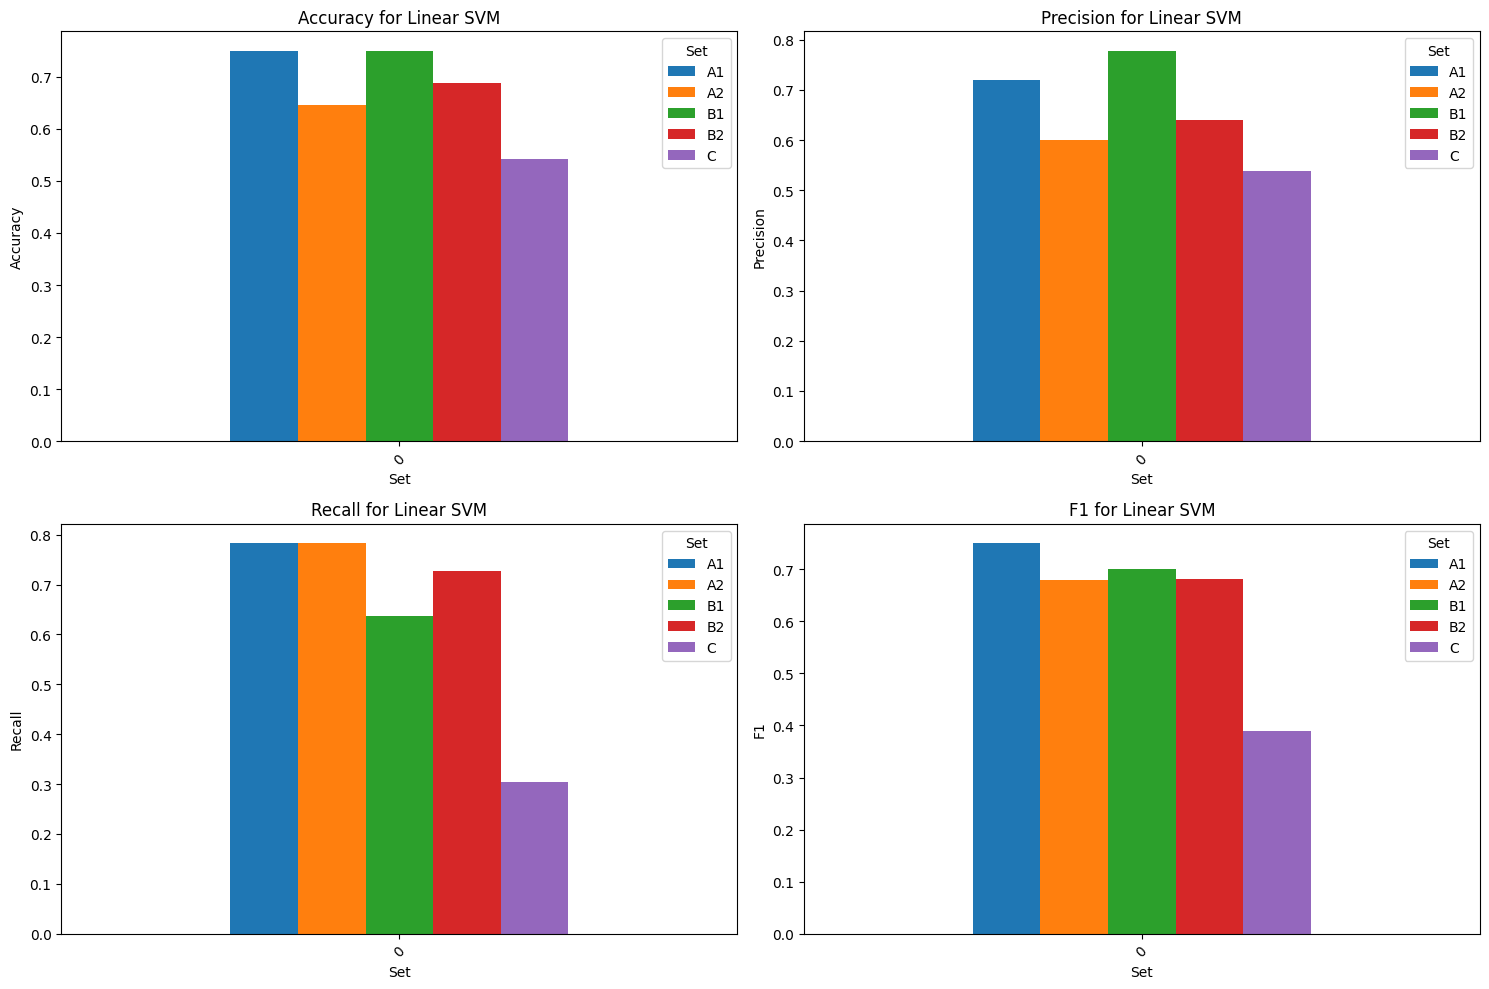

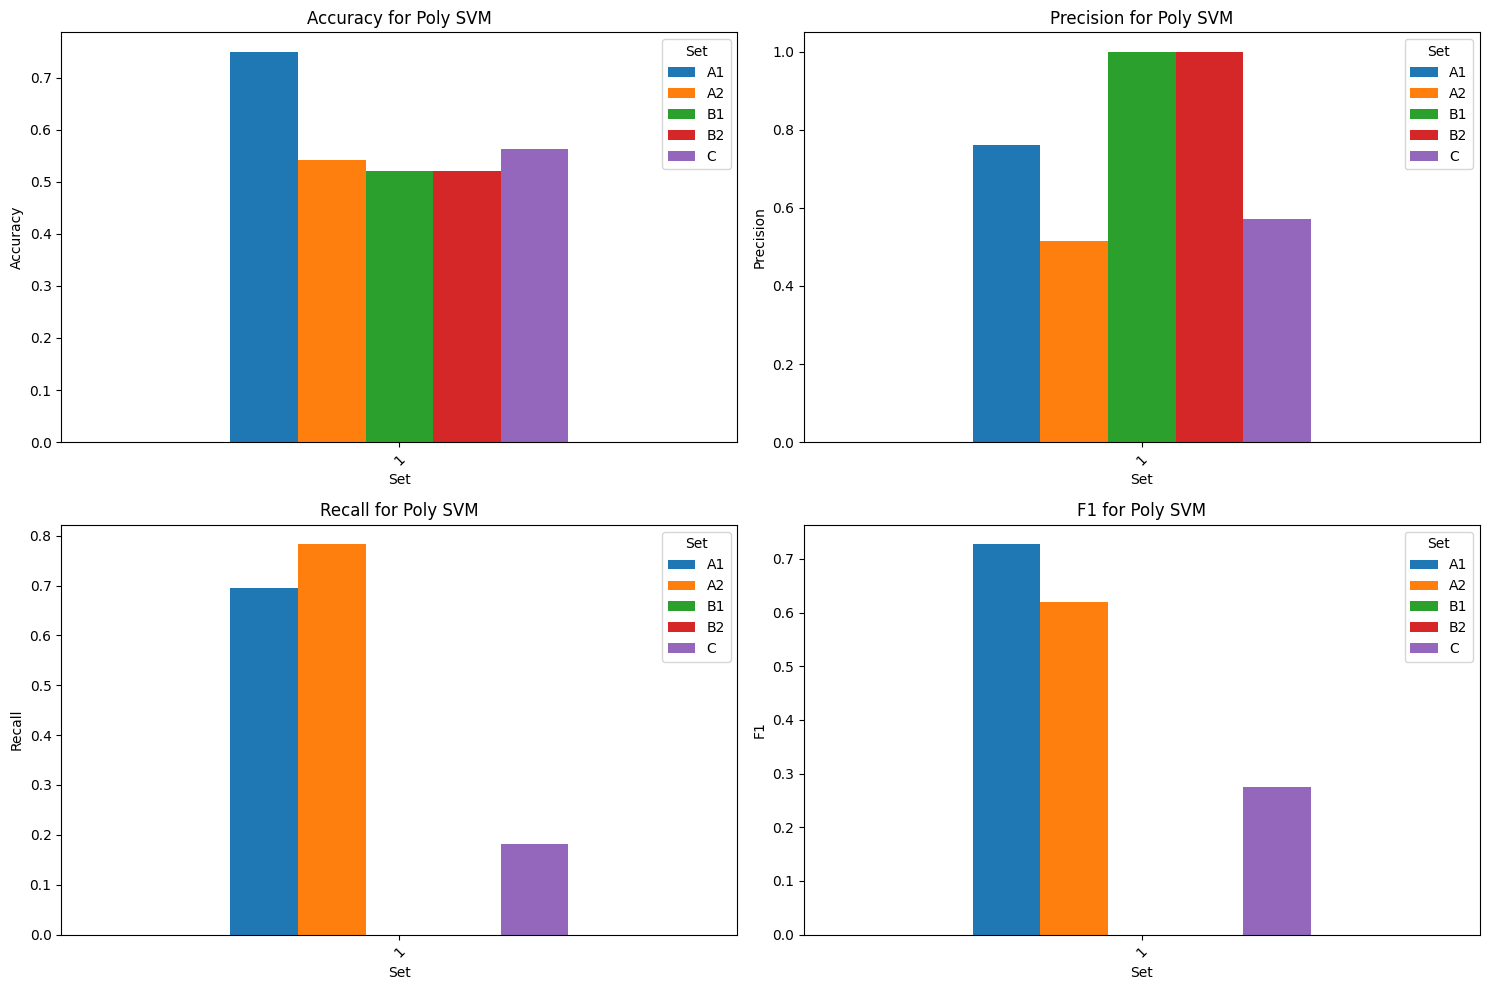

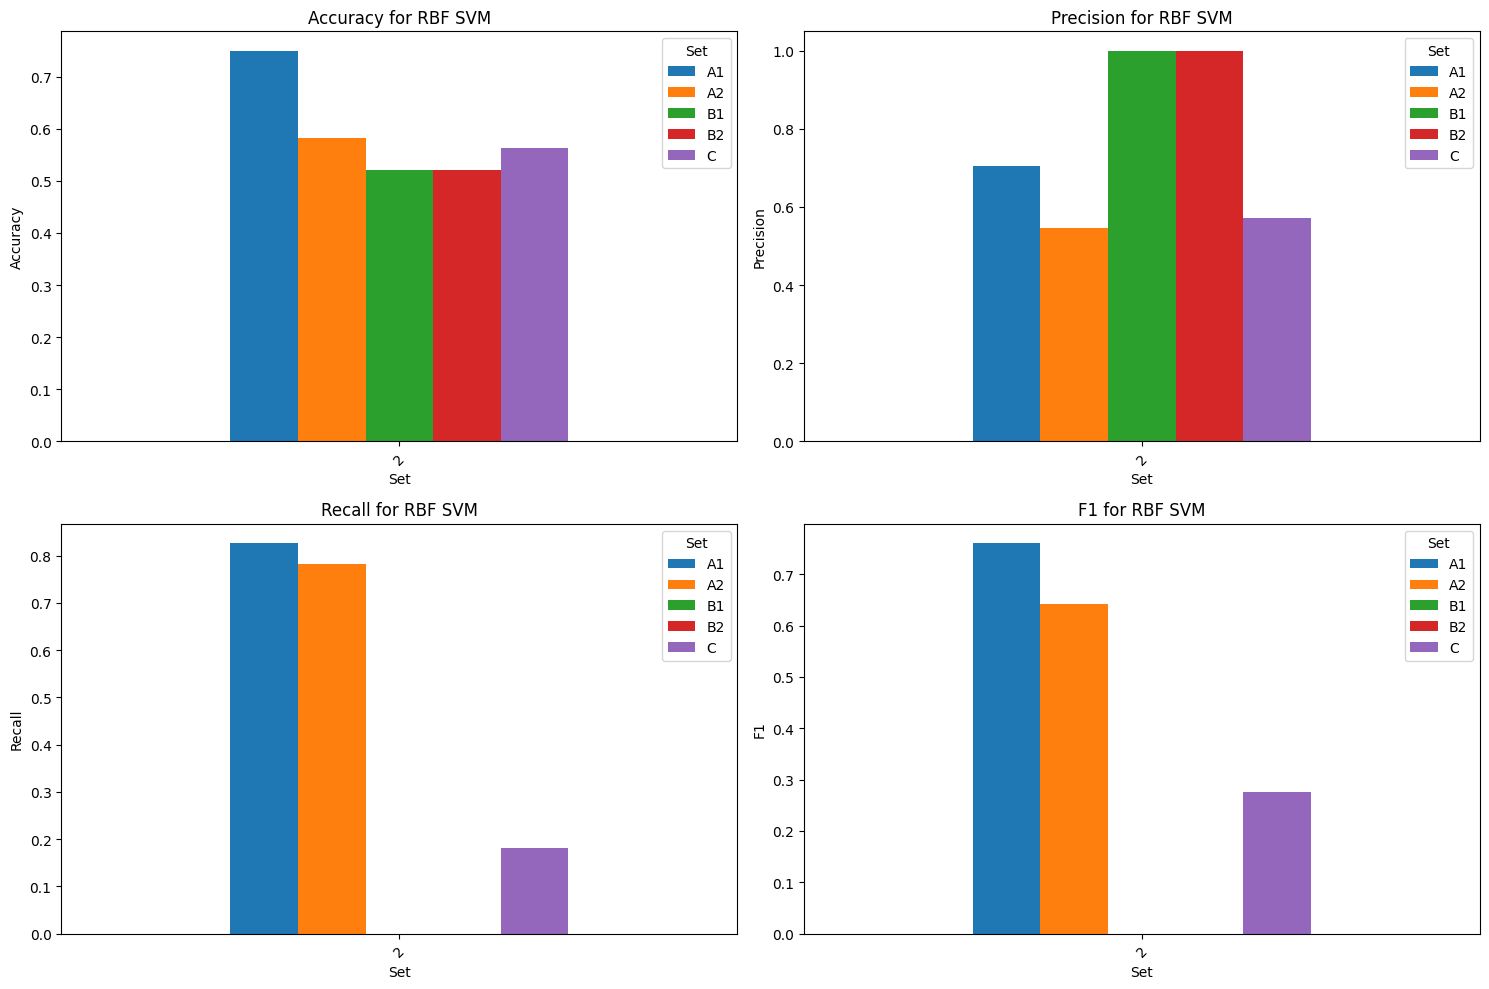

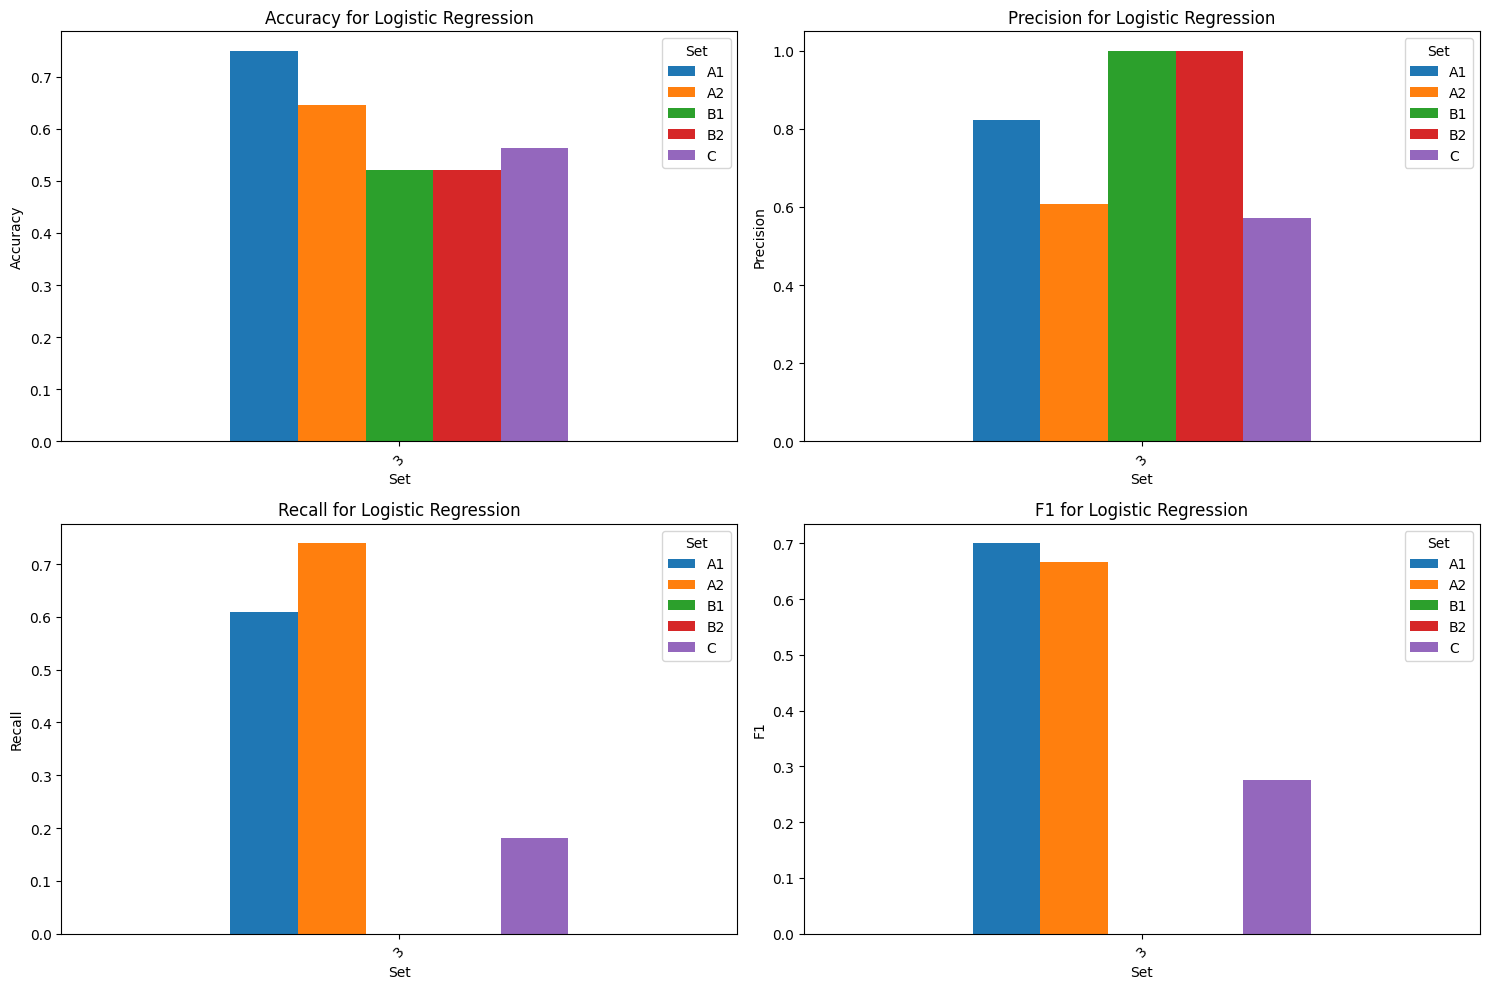

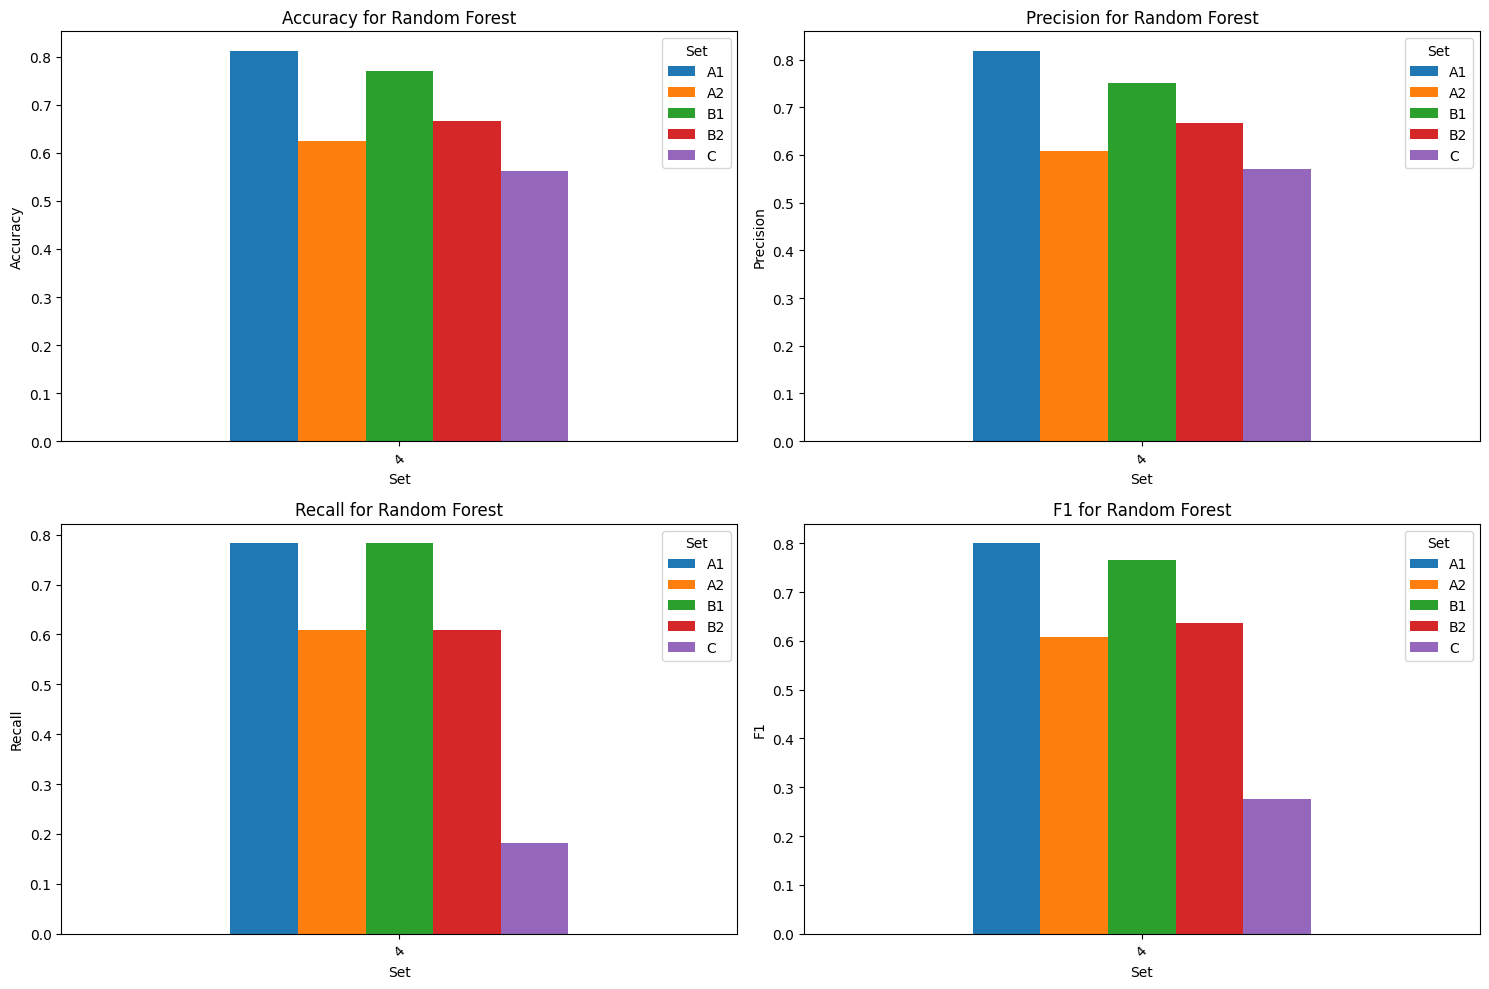

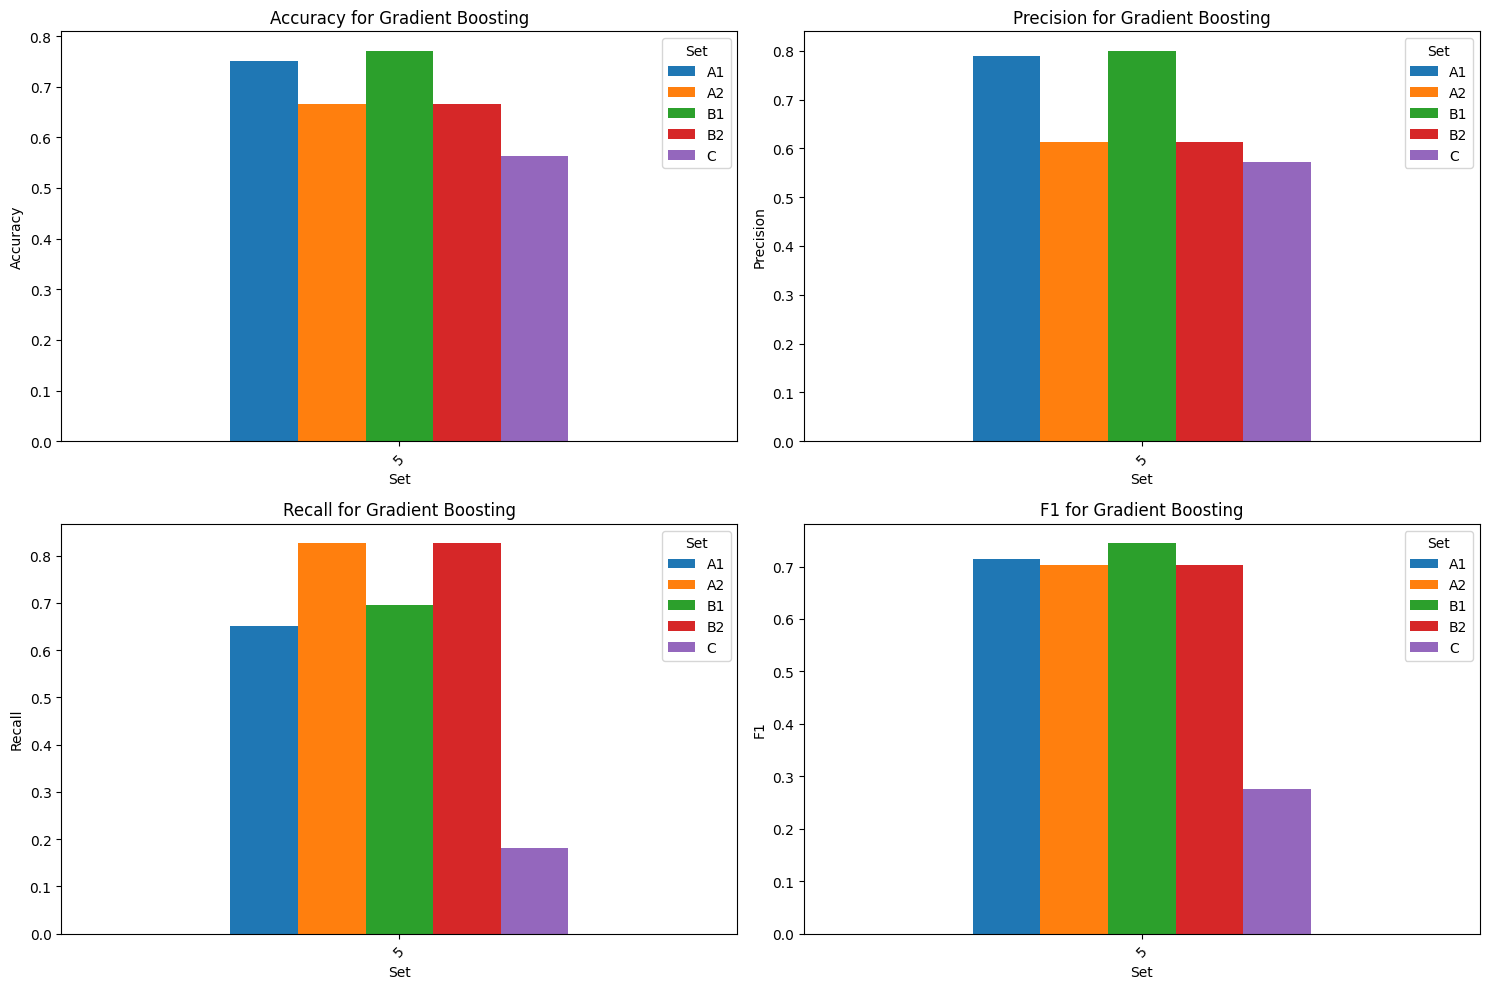

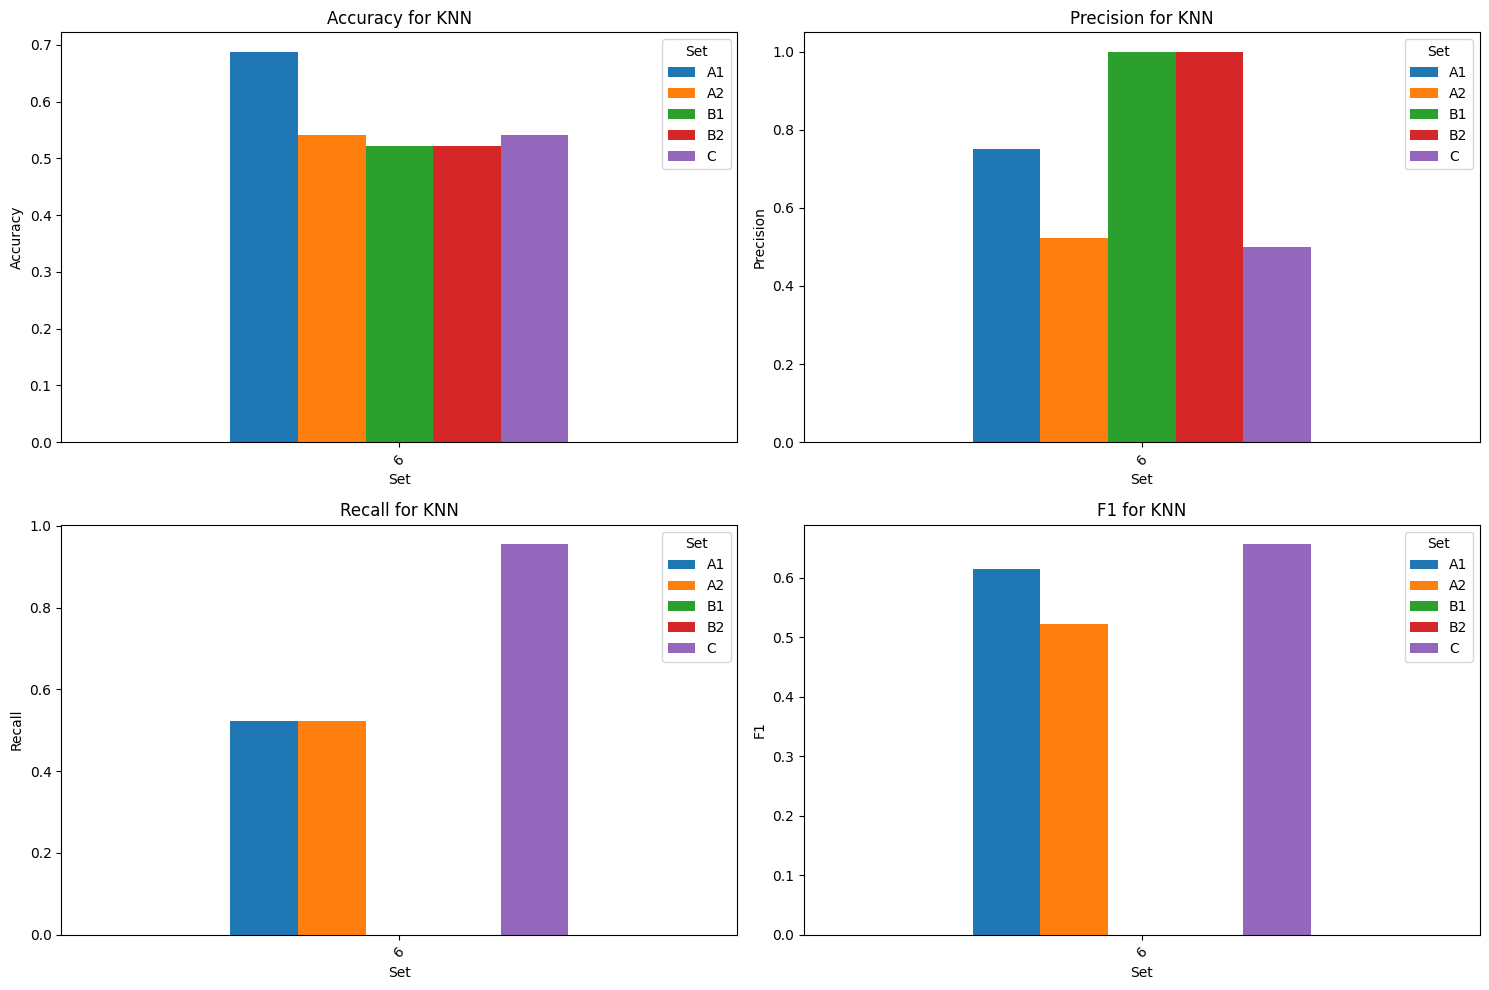

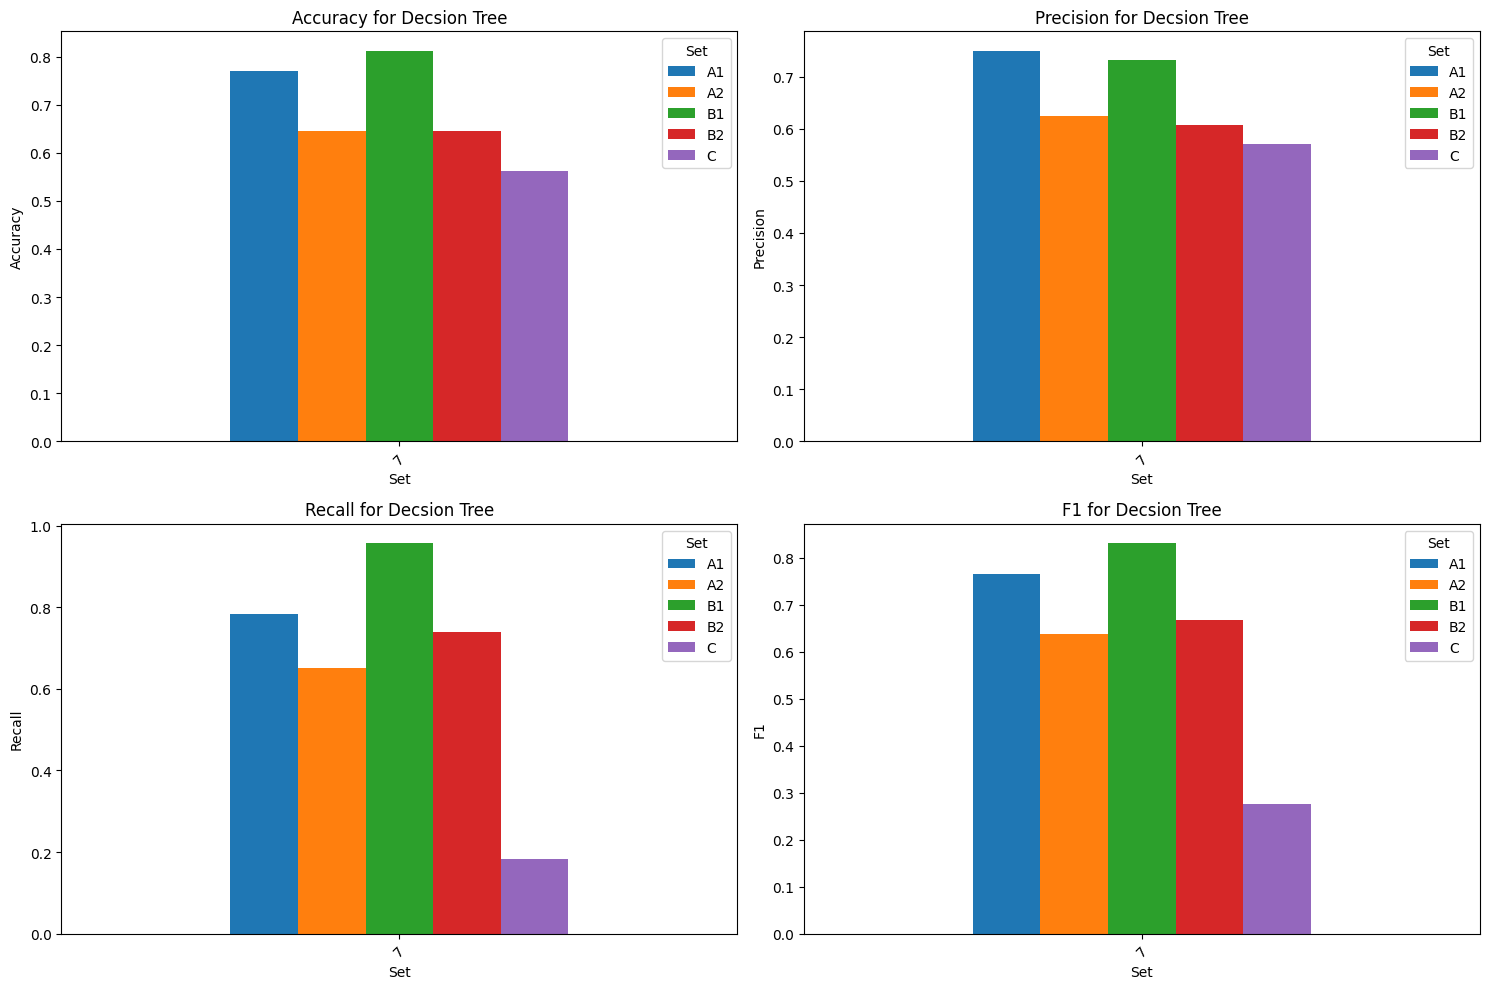

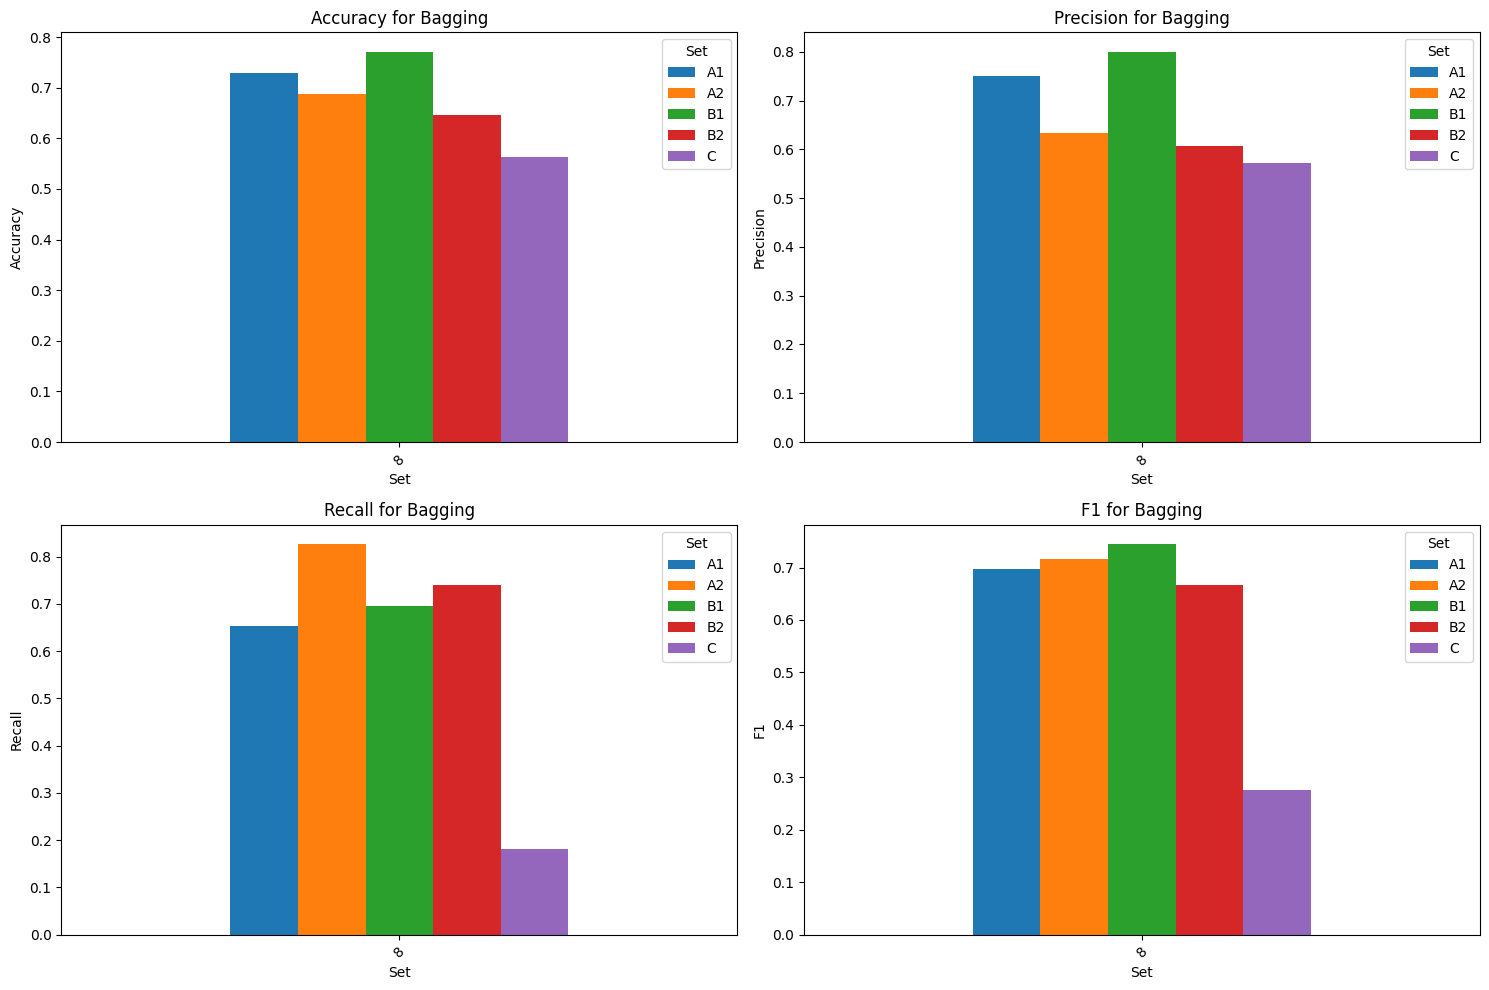

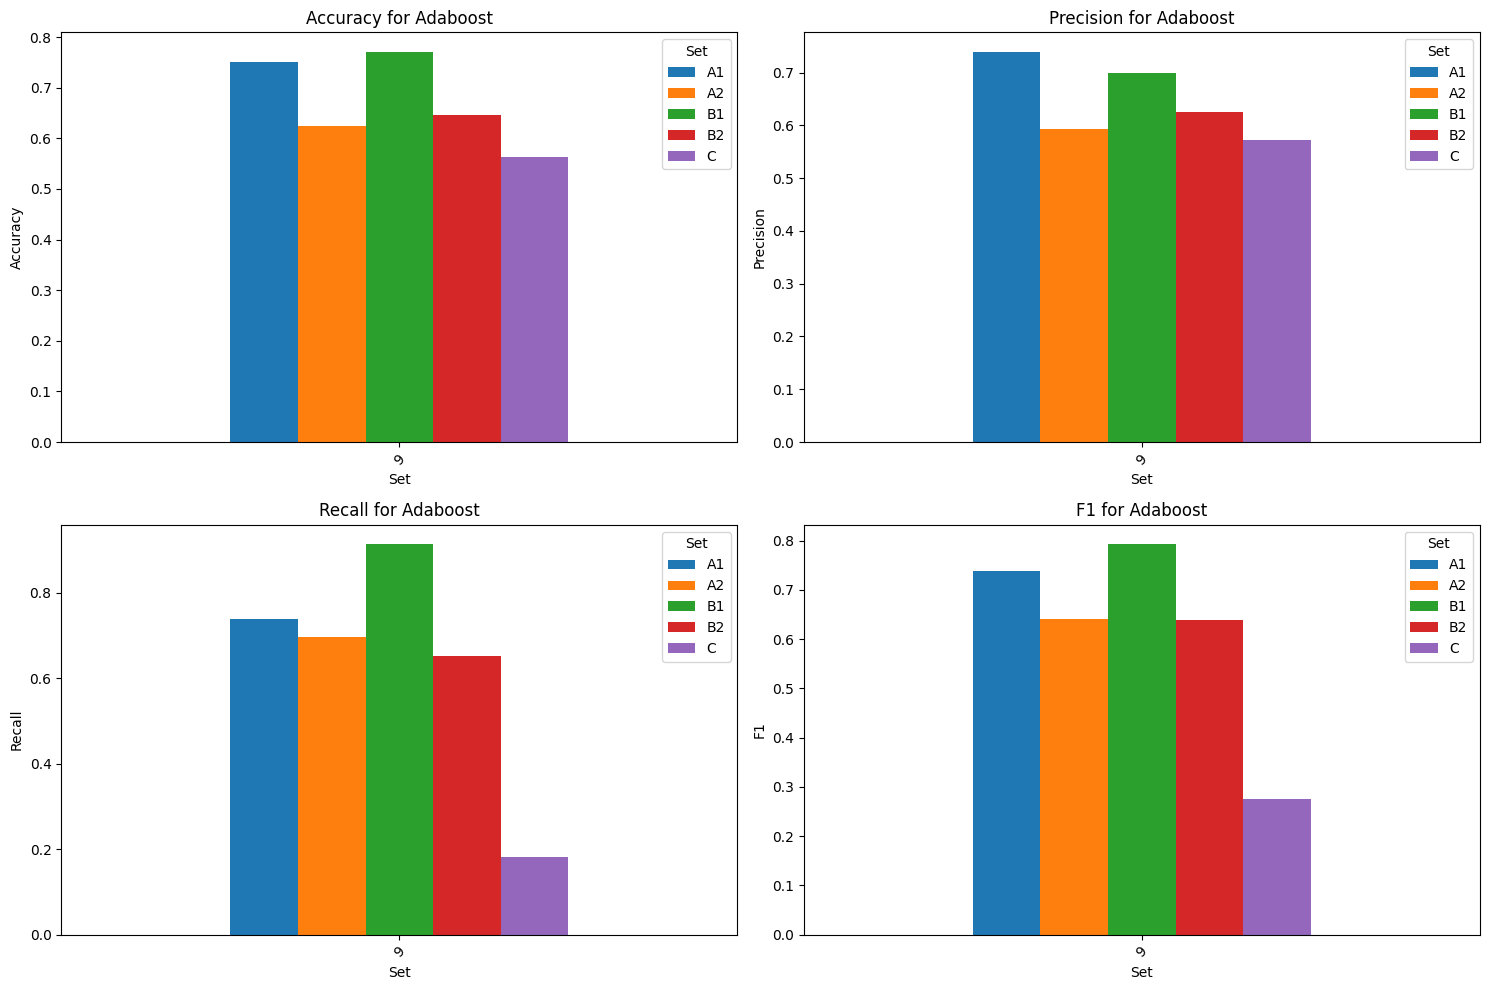

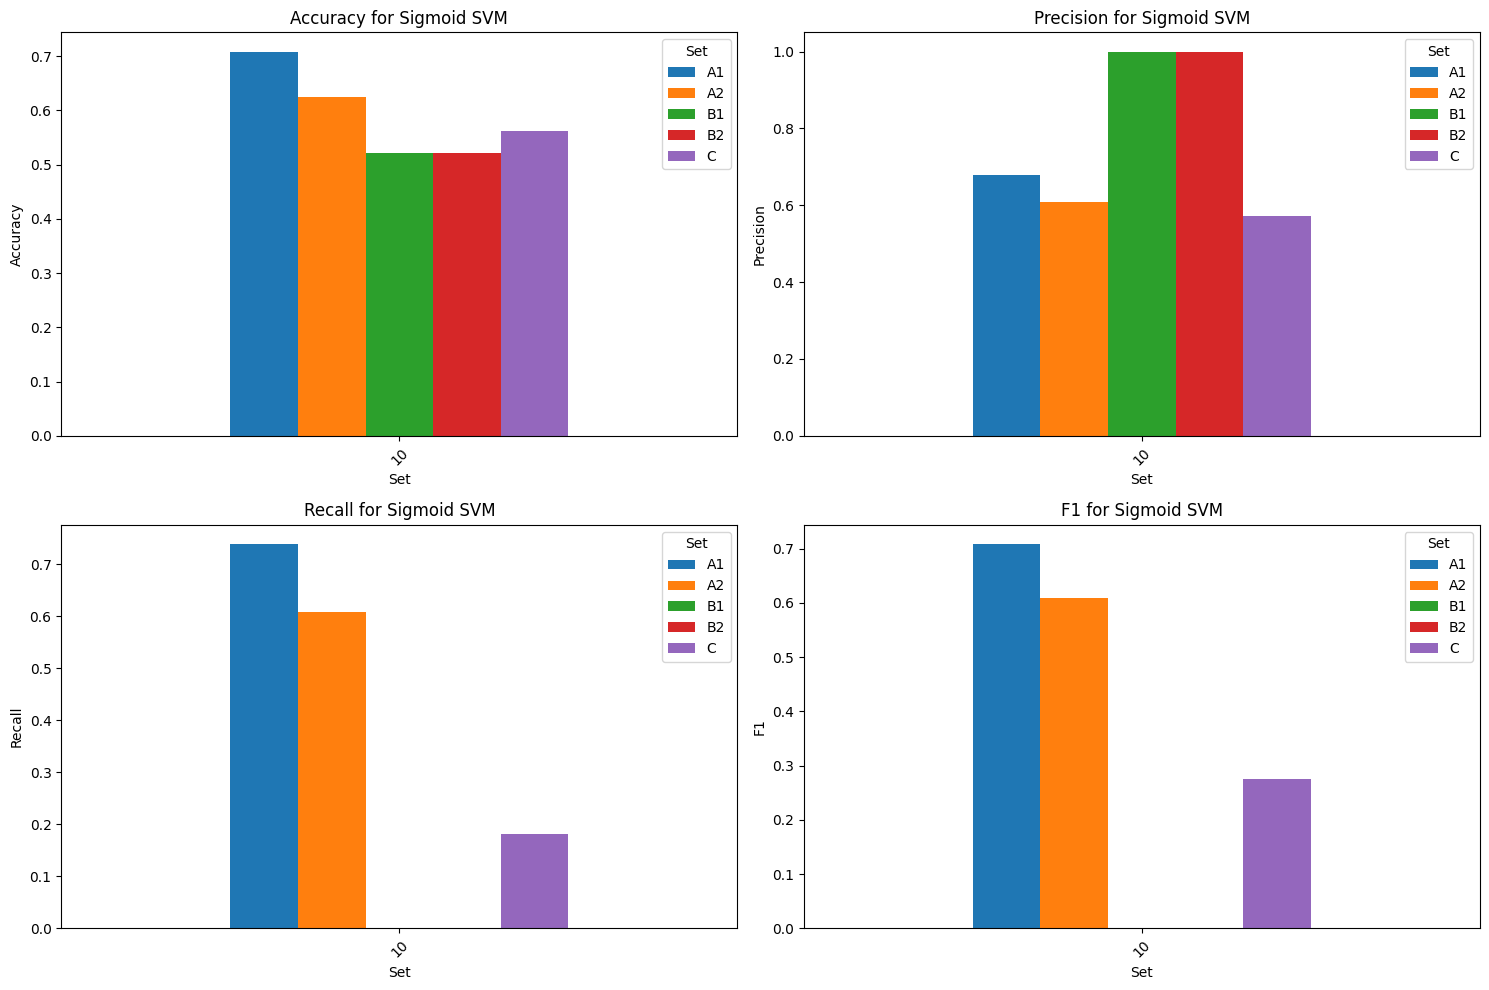

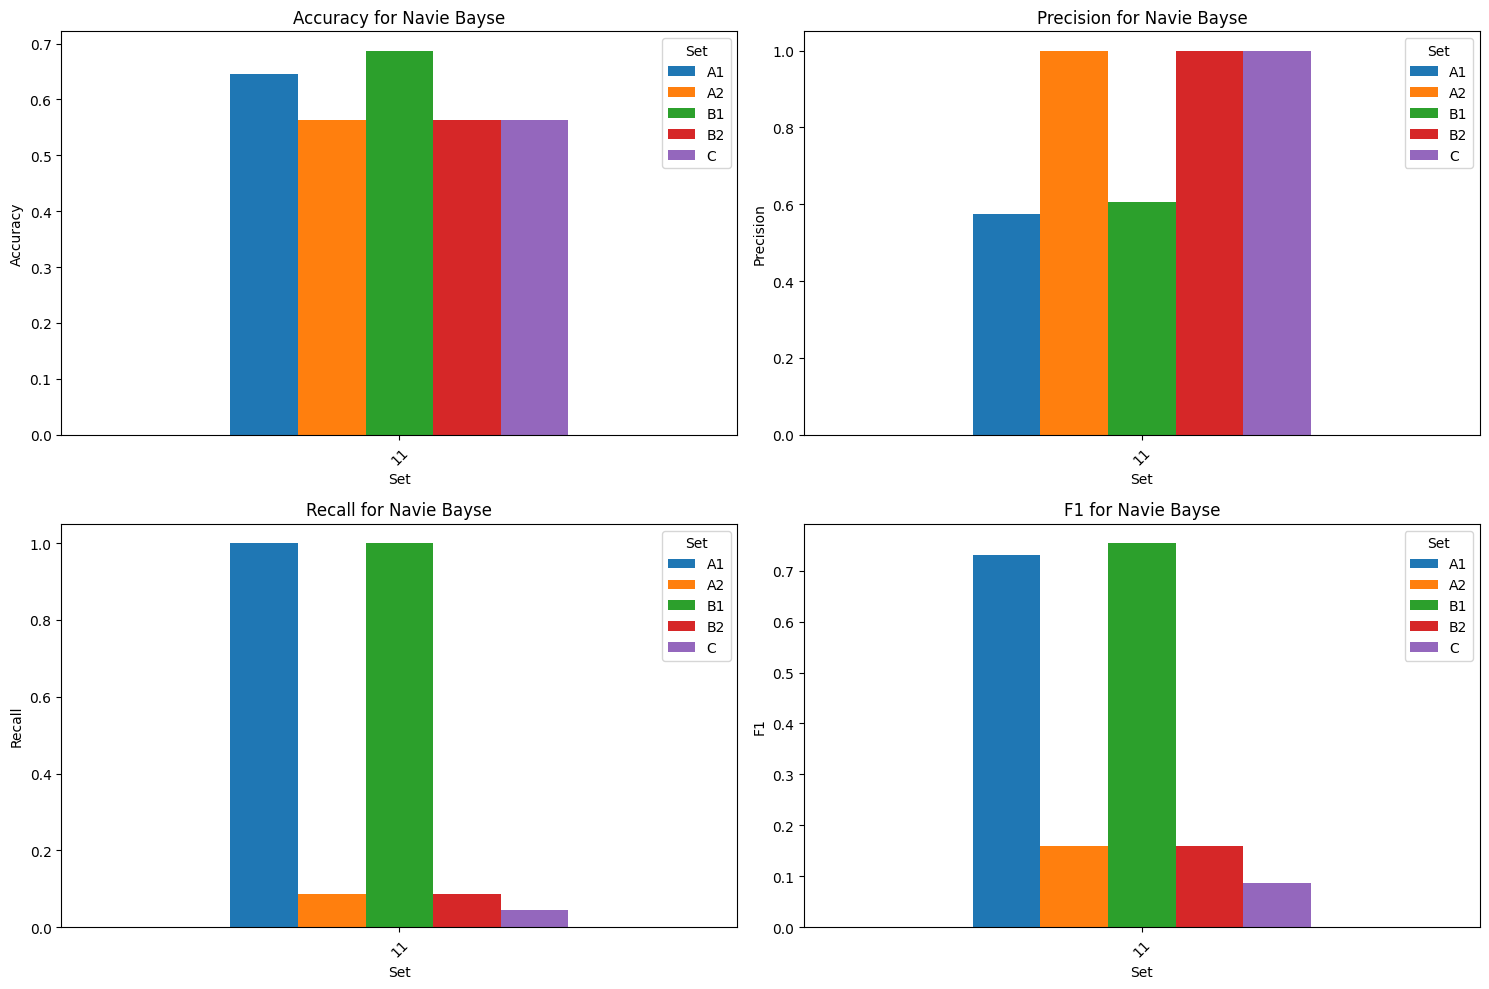

In [35]:
import matplotlib.pyplot as plt

# List of models
models = [
    'Linear SVM', 'Poly SVM', 'RBF SVM', 'Logistic Regression',
    'Random Forest', 'Gradient Boosting', 'KNN', 'Decsion Tree',
    'Bagging', 'Adaboost', 'Sigmoid SVM', 'Navie Bayse'
]

# Create subplots for each model
for model in models:
    # Filter data for the current model
    model_data = merged_df[merged_df['Model'] == model]
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plotting each metric
    for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1']):
        row = i // 2
        col = i % 2
        
        # Plot data for the current metric
        model_data[['{}{}'.format(metric, set_label) for set_label in ['A1', 'A2', 'B1', 'B2', 'C']]].plot(kind='bar', ax=axes[row, col], rot=45)
        axes[row, col].set_title(f'{metric} for {model}')
        axes[row, col].set_xlabel('Set')
        axes[row, col].set_ylabel(metric)
        axes[row, col].legend(['A1', 'A2', 'B1', 'B2', 'C'], title='Set')

    plt.tight_layout()
    plt.show()
